In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
from time import sleep
import math
import os
import seaborn as sns

In [3]:
train_data = pd.read_csv('/content/drive/My Drive/Facial Dataset/training.zip', compression='zip', header=0, sep=',', quotechar='"')
test_data = pd.read_csv('/content/drive/My Drive/Facial Dataset/test.zip', compression='zip', header=0, sep=',', quotechar='"')
lookid_data = pd.read_csv('/content/drive/My Drive/Facial Dataset/IdLookupTable.csv',header=0, sep=',', quotechar='"')

In [4]:
train_data.head(18).T.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
mouth_center_top_lip_x,43.312602,46.684596,47.274947,50.303165,44.962748,49.308112,45.127732,48.100194,49.21344,49.270154,46.469434,48.504,49.074316,46.482824,45.531789,49.703529,50.272235,50.280828
mouth_center_top_lip_y,72.935459,70.266553,70.191789,70.091687,73.707387,78.487626,65.099597,71.278602,67.648,67.542769,65.260075,72.7792,68.355789,63.541961,70.550737,71.232627,71.796706,70.255448
mouth_center_bottom_lip_x,43.130707,45.467915,47.274947,51.561183,44.227141,49.432374,45.415732,48.516816,49.49952,49.545231,46.206792,47.7888,49.638947,46.202353,44.778947,49.423059,50.587765,49.688938
mouth_center_bottom_lip_y,84.485774,85.48017,78.659368,78.268383,86.871166,93.898766,78.05702,91.063922,83.09312,76.893538,81.697811,94.588,83.88,74.197961,84.474947,85.813961,82.522588,80.611531
Image,238 236 237 238 240 240 239 241 241 243 240 23...,219 215 204 196 204 211 212 200 180 168 178 19...,144 142 159 180 188 188 184 180 167 132 84 59 ...,193 192 193 194 194 194 193 192 168 111 50 12 ...,147 148 160 196 215 214 216 217 219 220 206 18...,167 169 170 167 156 145 106 68 52 24 20 15 21 ...,109 109 125 141 145 139 120 81 45 34 31 35 36 ...,178 177 178 179 179 179 181 185 188 184 192 20...,164 158 118 76 66 69 59 53 43 31 35 41 45 55 6...,226 227 225 224 221 220 215 210 210 208 206 18...,52 51 54 57 57 56 55 55 56 59 62 66 67 72 79 8...,142 124 123 133 140 147 151 147 137 136 125 12...,86 93 106 114 112 110 111 113 138 147 148 132 ...,75 65 63 75 70 78 84 97 106 71 39 25 23 21 18 ...,119 106 101 106 89 66 67 72 85 112 118 109 96 ...,52 54 74 76 55 48 47 41 38 37 34 33 33 31 30 3...,201 200 202 193 124 59 53 50 48 56 66 76 114 1...,202 201 201 202 201 200 200 200 199 200 173 74...


In [5]:
len(train_data['Image'][1])

32691

In [6]:
pd.Series(train_data.columns)

0             left_eye_center_x
1             left_eye_center_y
2            right_eye_center_x
3            right_eye_center_y
4       left_eye_inner_corner_x
5       left_eye_inner_corner_y
6       left_eye_outer_corner_x
7       left_eye_outer_corner_y
8      right_eye_inner_corner_x
9      right_eye_inner_corner_y
10     right_eye_outer_corner_x
11     right_eye_outer_corner_y
12     left_eyebrow_inner_end_x
13     left_eyebrow_inner_end_y
14     left_eyebrow_outer_end_x
15     left_eyebrow_outer_end_y
16    right_eyebrow_inner_end_x
17    right_eyebrow_inner_end_y
18    right_eyebrow_outer_end_x
19    right_eyebrow_outer_end_y
20                   nose_tip_x
21                   nose_tip_y
22          mouth_left_corner_x
23          mouth_left_corner_y
24         mouth_right_corner_x
25         mouth_right_corner_y
26       mouth_center_top_lip_x
27       mouth_center_top_lip_y
28    mouth_center_bottom_lip_x
29    mouth_center_bottom_lip_y
30                        Image
dtype: o

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

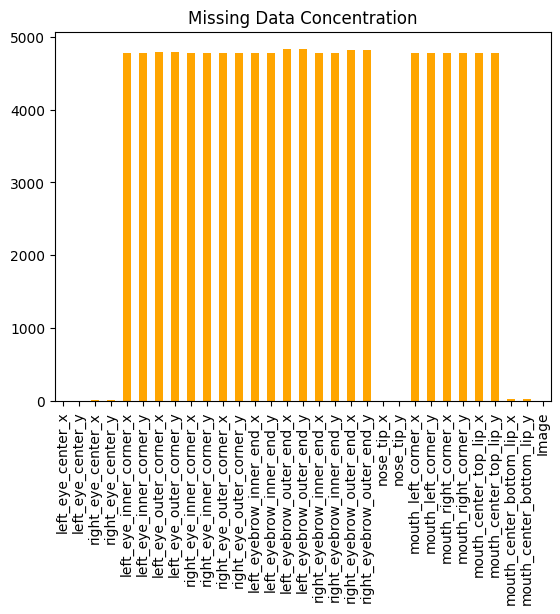

In [7]:
display(train_data.isnull().sum())
train_data.isnull().sum().plot(kind='bar',color = 'orange')
plt.title("Missing Data Concentration")
plt.show()

In [8]:
train_data.fillna(method = 'ffill',inplace = True)

<ipython-input-9-c745dba5a3f7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr())


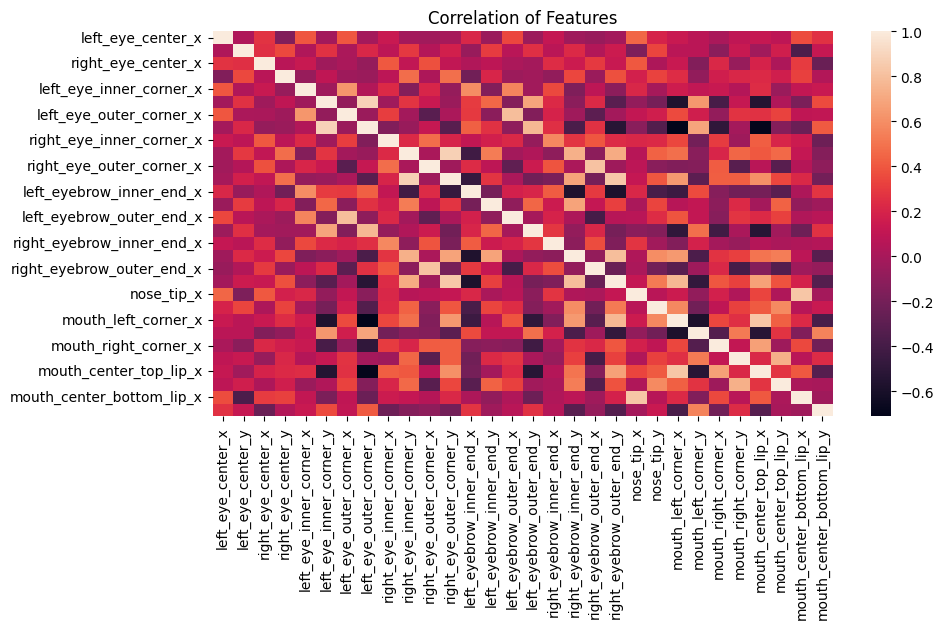

In [9]:
plt.figure(figsize =(10,5))
sns.heatmap(train_data.corr())
plt.title("Correlation of Features")
plt.show()

In [10]:
img_dt = []
for i in range(len(train_data)):
  img_dt.append(train_data['Image'][i].split(' '))
X = np.array(img_dt, dtype='float')
X_train1 = X

In [11]:
foto = X_train1[0]

In [12]:
foto.reshape(96,96)

array([[238., 236., 237., ..., 250., 250., 250.],
       [235., 238., 236., ..., 249., 250., 251.],
       [237., 236., 237., ..., 251., 251., 250.],
       ...,
       [186., 183., 181., ...,  52.,  57.,  60.],
       [189., 188., 207., ...,  61.,  69.,  78.],
       [191., 184., 184., ...,  70.,  75.,  90.]])

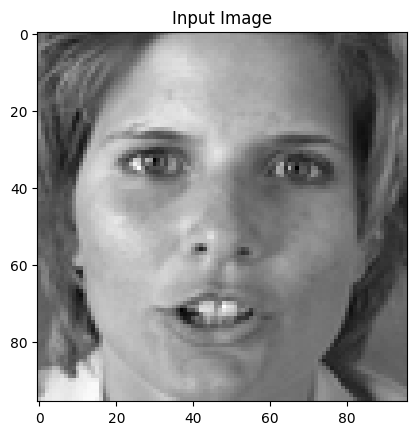

In [13]:
plt.imshow(X_train1[33].reshape(96,96), cmap='gray')
plt.title("Input Image")
plt.show()

In [14]:
facial_pts_data = train_data.drop(['Image'], axis=1)
facial_pts = []
for i in range(len(facial_pts_data)):
  facial_pts.append(facial_pts_data.iloc[i])
y = np.array(facial_pts, dtype='float')
t = facial_pts_data.iloc[0].values

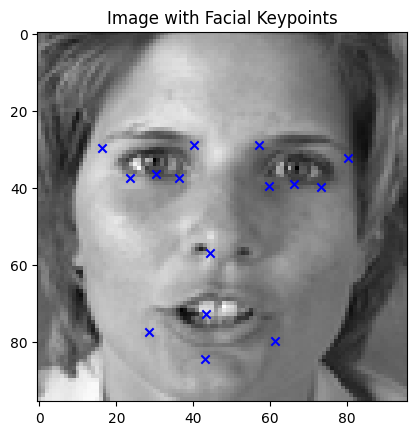

In [15]:
plt.imshow(X_train1[33].reshape(96,96), cmap='gray')
plt.scatter(t[0::2], t[1::2], c='blue', marker='x')
plt.title("Image with Facial Keypoints")
plt.show()

In [16]:
def gaussian(xL, yL, H, W, sigma=5):
    channel = [math.exp(-((c - xL) ** 2 + (r - yL) ** 2) / (2 * sigma ** 2)) for r in range(H) for c in range(W)]
    channel = np.array(channel, dtype=np.float32)
    channel = np.reshape(channel, newshape=(H, W))
    return channel

(15, 96, 96)

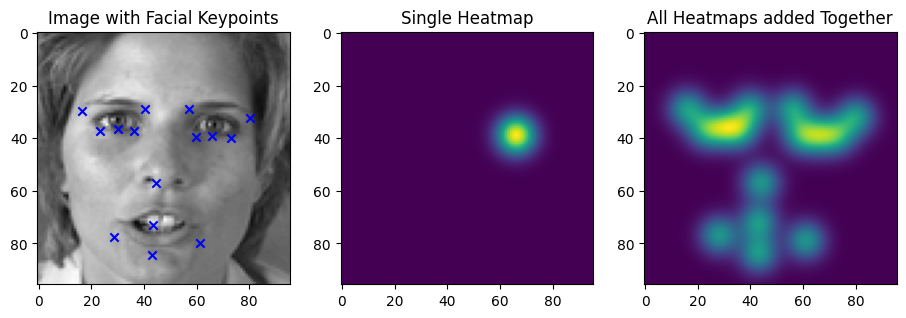

In [17]:
heatmaps = []
for i in range(0, 30, 2):
    x = int(y[0][i])
    Y = int(y[0][i + 1])
    heatmap = gaussian(x, Y, 96, 96)
    heatmaps.append(heatmap)
heatmaps = np.array(heatmaps)
plt.figure(figsize=(15,15))
plt.subplot(1,4,1)
plt.imshow(X_train1[33].reshape(96,96), cmap='gray')
plt.scatter(t[0::2], t[1::2], c='blue', marker='x')
plt.title("Image with Facial Keypoints")
plt.subplot(1,4,2)
plt.imshow(heatmaps[0])
plt.title("Single Heatmap")
plt.subplot(1,4,3)
plt.imshow(heatmaps.sum(axis=0))
plt.title("All Heatmaps added Together")
heatmaps.shape

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils
from PIL import Image

In [19]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # SEE THE FORWARD FUNCTION COMMENTS TO SEE WHERE THE DIMENSIONS OF THE IMAGE COME FROM
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=5) # (b,1,96,96) to (b,4,92,92)
        self.conv1_bn = nn.BatchNorm2d(4)
        self.conv2 = nn.Conv2d(in_channels=4, out_channels=64, kernel_size=3) # (b,4,46,46) to (b,64,44,44)
        self.conv2_bn = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3) # (b,64,22,22) to (b,128,20,20)
        self.conv3_bn = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3) # (b,128,10,10) to (b,256,8,8)
        self.conv4_bn = nn.BatchNorm2d(256)
        self.fc1 = nn.Linear(256*4*4, 1024)
        self.fc2 = nn.Linear(1024, 256)
        self.fc3 = nn.Linear(256, 30)
        self.dp1 = nn.Dropout(p=0.4)
    def forward(self, x, verbose=False):
        # 1 CONVOLUTIONAL LAYER
        # Input size: 96x96
        # (Hinput_size - Hkernel_size + 1 = Outputsize)
        # Output size = 96-5+1 = 92 
        # Max Pool from 1 Layer
        # Output after Max Pooling window (2,2): (92-2+2)/2 = 46
        x = self.conv1_bn(self.conv1(x))
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = self.dp1(x)
        # 2 CONVOLUTIONAL LAYER
        # Input size: 46x46
        # (Hinput_size - Hkernel_size + 1 = Outputsize)
        # Output size = 46-3+1 = 44 
        # Max Pool from 2 Layer
        # Output after Max Pooling window (2,2): (44-2+2)/2 = 22
        x = self.conv2_bn(self.conv2(x))
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = self.dp1(x)
        # 3 CONVOLUTIONAL LAYER
        # Input size: 22x22
        # (Hinput_size - Hkernel_size + 1 = Outputsize)
        # Output size = 22-3+1 = 20
        # Max Pool from 3 Layer
        # Output after Max Pooling window (2,2): (20-2+2)/2 = 10
        x = self.conv3_bn(self.conv3(x))
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = self.dp1(x)
        # 4 CONVOLUTIONAL LAYER
        # Input size: 10x10
        # (Hinput_size - Hkernel_size + 1 = Outputsize)
        # Output size = 10-3+1 = 8
        # Max Pool from 4 Layer
        # Output after Max Pooling window (2,2): (8-2+2)/2 = 4
        x = self.conv4_bn(self.conv4(x))
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = self.dp1(x)
        # END OF THE CONVOLTUTION STAGE
        # 256 outputs of size 4x4
        x = x.view(-1, 256*4*4)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dp1(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.dp1(x)
        x = self.fc3(x)
        return x

In [20]:
class LeNet5(nn.Module):   
    def __init__(self):
        super(LeNet5, self).__init__()
        # Convolution Block
        # 1 input image channel, 6 output channels, 5x5 square convolution kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        # 6 input image channels, 16 output channels, 5x5 square convolution kernel
        self.conv2 = nn.Conv2d(6, 16, 5)
        # Fully connected Block
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 21 * 21, 120)  # 21*21 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 30)
    def forward(self, x):       
        # The image size of our dataset is 96x96, then
        # Input size: 96x96   
        # 1 input image channel, 6 output channels, 5x5 square convolution kernel
        # Output from layer conv1: 6 layers of 96x96 size (96-5+1 = 92)
        # Output after Max Pooling window (2,2): (92-2+2)/2 = 46
        x = F.max_pool2d(torch.sigmoid(self.conv1(x)), 2, 2)         
        # Input size for the next layer: 46x46
        # 6 input image channel, 16 output channels, 5x5 square convolution kernel
        # Output from layer conv1: 16 layers of 46x46 size (46-5+1 = 42)
        # Output after Max Pooling window (2,2): (42-2+2)/2 = 21
        x = F.max_pool2d(torch.sigmoid(self.conv2(x)), 2, 2)        
        # Input size for the fully connected stage: 16 layers of 21x21 size
        x = x.view(-1, self.num_flat_features(x))
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [21]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
def testing(model, device, valid_loader):
  # we have to tell the model that we are on evaluation mode
  model.eval()
  test_loss = 0
  for data, target in valid_loader:
    data, target = data.to(device), target.to(device)
    # Arrange the data dimensions to feed the model
    data = data.view(-1, 96*96)
    data = data.view(-1, 1, 96, 96)
    # Prediction of coordinates for test data
    output = model(data)
    loss = criterion(output, target)
    test_loss += loss.item()   
  test_loss /= len(valid_loader.dataset)
  return test_loss
def training(epochs, model, criterion, device, train_loader, valid_loader, optimizer):
  train_error_list = []
  val_error_list = []
  for epoch in range(epochs):
    # We have to tell the model that we are on trainnig mode (not all the parameters are the same in evaluation and training mode)
    model.train()
    train_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
      data, target = data.to(device), target.to(device)
      # Arrange the data dimensions to feed the model
      data = data.view(-1, 96*96)
      data = data.view(-1, 1, 96, 96)
      optimizer.zero_grad()
      output = model(data)
      loss = criterion(output, target)
      train_loss += loss.item()
      loss.backward()
      optimizer.step()
    train_loss /= len(train_loader.dataset)
    # Send the validation data to testing data to evaluate how good is doing the model
    eval_loss = testing(model, device, valid_loader)
    train_error_list.append(train_loss)
    val_error_list.append(eval_loss)
    if (epoch+1) % 10 == 0:
      print("End of epoch {}: \nTraining error = [{}]\tValidation error = [{}]".format(epoch+1, train_loss, eval_loss))
  return train_error_list, val_error_list

In [22]:
def train_test_split(X, validation_split):
  dataset_size = len(X)
  indices = list(range(dataset_size))
  val_num = int(np.floor(validation_split*dataset_size))
  np.random.shuffle(indices)
  # Split the indexes
  train_indices, val_indices = indices[val_num:], indices[:val_num]
  train_sampler = data_utils.SubsetRandomSampler(train_indices)
  valid_sampler = data_utils.SubsetRandomSampler(val_indices)
  loader_object = data_utils.TensorDataset(torch.from_numpy(X).float(), torch.from_numpy(y).float())
  train_loader = data_utils.DataLoader(loader_object, batch_size=32, sampler=train_sampler)
  valid_loader = data_utils.DataLoader(loader_object, batch_size=32, sampler=valid_sampler)
  return train_loader, valid_loader

In [23]:
def get_n_params(model):
    np=0
    for p in list(model.parameters()):
        np += p.nelement()
    return np
n_hidden = 128 # number of hidden units
output_size = 30
# We are creating a validation data to check on the evolution of out model, change 0.2 
# for changing the proportion of validation data used
train_loader, valid_loader = train_test_split(X, 0.2)
# Depending which model we want to use we need to specify on this line whether we want to use CNN or LeNet5
model = CNN()
model.to(device)
criterion = torch.nn.MSELoss() 
optimizer = optim.Adam(model.parameters())
print('Number of parameters: {}'.format(get_n_params(model)))
train_error_list, valid_error_list = training(500, model, criterion, device, train_loader, valid_loader, optimizer)

Number of parameters: 4837838
End of epoch 10: 
Training error = [1.0870261517699382]	Validation error = [0.24143551163410257]
End of epoch 20: 
Training error = [1.0978987316727418]	Validation error = [0.38578369350598407]
End of epoch 30: 
Training error = [1.002436405311224]	Validation error = [0.16459189666756704]
End of epoch 40: 
Training error = [0.9729211920625792]	Validation error = [0.058256083810594946]
End of epoch 50: 
Training error = [0.9803411773560419]	Validation error = [0.2745404773137978]
End of epoch 60: 
Training error = [0.9822966737567254]	Validation error = [0.10025471135189659]
End of epoch 70: 
Training error = [0.9579476010023169]	Validation error = [0.11911372553965677]
End of epoch 80: 
Training error = [0.9117698674845279]	Validation error = [0.08652088865014167]
End of epoch 90: 
Training error = [0.9116060833573122]	Validation error = [0.13537380147071607]
End of epoch 100: 
Training error = [0.8398139981754047]	Validation error = [0.0810712216880951]
E

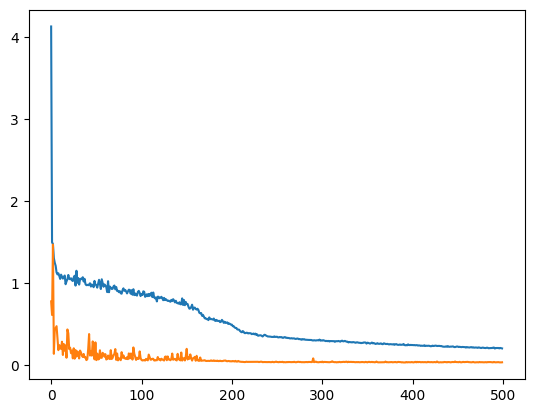

In [24]:
plt.plot(train_error_list)
plt.plot(valid_error_list)

In [25]:
def get_n_params(model):
    np=0
    for p in list(model.parameters()):
        np += p.nelement()
    return np
n_hidden = 128 # number of hidden units
output_size = 30
# We are creating a validation data to check on the evolution of out model, change 0.2 
# for changing the proportion of validation data used
train_loader, valid_loader = train_test_split(X, 0.2)
# Depending which model we want to use we need to specify on this line whether we want to use CNN or LeNet5
model = LeNet5()
model.to(device)
criterion = torch.nn.MSELoss() 
optimizer = optim.Adam(model.parameters())
print('Number of parameters: {}'.format(get_n_params(model)))
train_error_list, valid_error_list = training(500, model, criterion, device, train_loader, valid_loader, optimizer)

Number of parameters: 862126
End of epoch 10: 
Training error = [0.25357718818795516]	Validation error = [0.05577727631823123]
End of epoch 20: 
Training error = [0.23240086703896437]	Validation error = [0.053452581357475645]
End of epoch 30: 
Training error = [0.23315204933427347]	Validation error = [0.055348916093683156]
End of epoch 40: 
Training error = [0.23303268736753924]	Validation error = [0.053864432118567764]
End of epoch 50: 
Training error = [0.23297647889378495]	Validation error = [0.054094136192504694]
End of epoch 60: 
Training error = [0.2330634217513235]	Validation error = [0.06232651698198669]
End of epoch 70: 
Training error = [0.23383443530425396]	Validation error = [0.053564593747653495]
End of epoch 80: 
Training error = [0.2333622070758423]	Validation error = [0.05428875617261203]
End of epoch 90: 
Training error = [0.2335473669557846]	Validation error = [0.05343812835150567]
End of epoch 100: 
Training error = [0.23481165410643995]	Validation error = [0.0537828

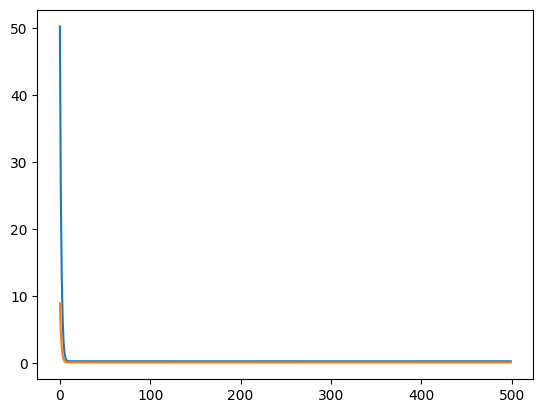

In [26]:
plt.plot(train_error_list)
plt.plot(valid_error_list)

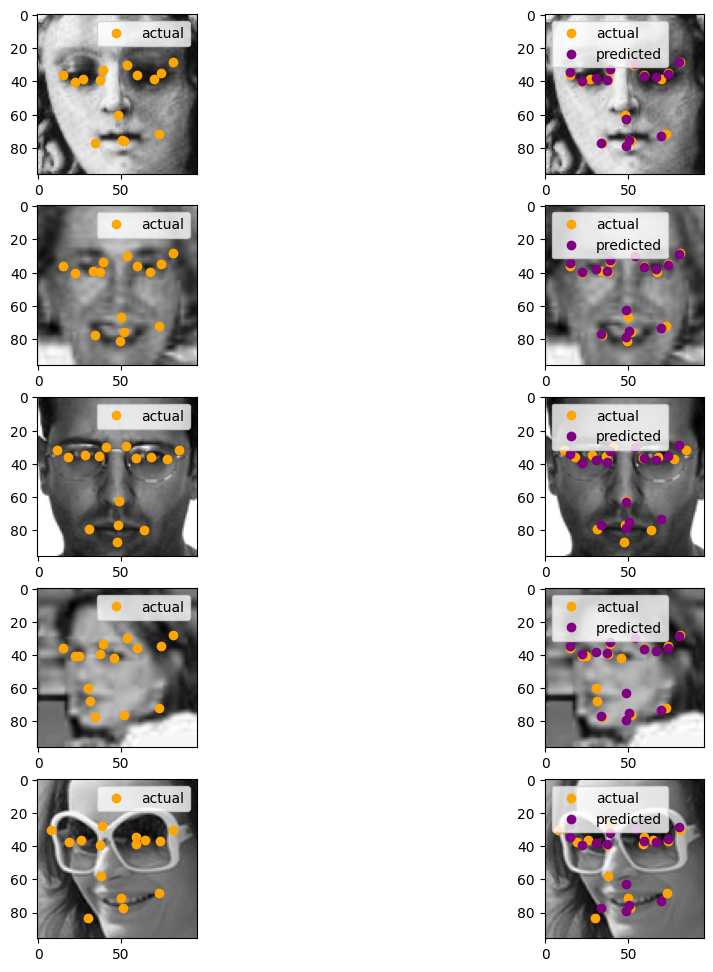

In [40]:
def plot_samples(X, y, model, num_samples):
  fig, axes = plt.subplots(nrows=num_samples, ncols=2, figsize=(12,12))
  
  for row in range(num_samples):
    # get random indexes to dispaly the results on the images
    sample_idx = np.random.choice(len(X))
    x = X[sample_idx]
    x = torch.from_numpy(x).float().view(1,1,96,96).to(device)
    actual_y = y[sample_idx]
    pred_y = model(x)
    img = X[sample_idx].reshape(96,96)
    
    # Set the coordinates data so we can plot them along the original image
    actual_y = np.vstack(np.split(actual_y, 15)).T
    pred_y = pred_y.cpu().data.numpy()[0]
    pred_y = np.vstack(np.split(pred_y, 15)).T
    
    # Representation
    axes[row, 0].imshow(img, cmap='gray')
    axes[row, 0].plot(actual_y[0], actual_y[1], 'o', color='orange', label='actual')
    axes[row, 0].legend()
    axes[row, 1].imshow(img, cmap='gray')
    axes[row, 1].plot(actual_y[0], actual_y[1], 'o', color='orange', label='actual')
    axes[row, 1].plot(pred_y[0], pred_y[1], 'o', color='purple', label='predicted')
    axes[row, 1].legend()

 # change three for another number to see display the results in more than three pictures 
plot_samples(X, y, model, 5)

In [33]:
img_dt = []
for i in range(len(test_data)):
  img_dt.append(test_data['Image'][i].split(' '))
test_X = np.array(img_dt, dtype='float')

In [34]:

# Prepare the data to feed it into the model, numpy to torch plus the size (4dimensions)
test_X_torch = torch.from_numpy(test_X).float().view(len(test_X),1,96,96).to(device)
# Obtaining the coordinates
test_predictions = model(test_X_torch)
test_predictions = test_predictions.cpu().data.numpy()
# lists of coordinates
keypts_labels = train_data.columns.tolist()

In [35]:
test_X_torch.shape  

torch.Size([1783, 1, 96, 96])

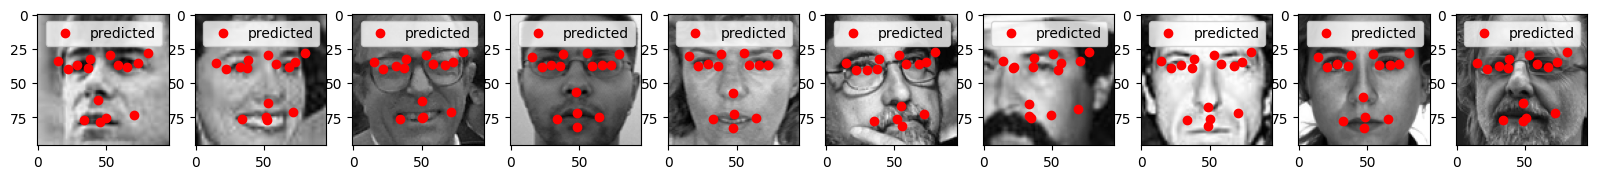

In [41]:
def plot_samples_test(X, y, num_samples):
  fig, axes = plt.subplots(nrows=1, ncols=num_samples, figsize=(20,12))
  for row in range(num_samples):
    sample_idx = np.random.choice(len(X))
    img = X[sample_idx].reshape(96,96)
    predicted = y[sample_idx]
    predicted = np.vstack(np.split(predicted, 15)).T
    axes[row].imshow(img, cmap='gray')
    axes[row].plot(predicted[0], predicted[1], 'o', color='red', label='predicted')
    axes[row].legend()
plot_samples_test(test_X, test_predictions, 10)